# Reading raster files with Rasterio

Raster data is made up of pixels (also referred to as grid cells).\
You can find different raster file format in this link https://gdal.org/drivers/raster/index.html\
Raster data is made up of pixels (also referred to as grid cells).\
Raster grid format is data model for satellite data and other remote sensing data. For raster positions, it’s simple to understand cell size. Most common file formats include for example TIFF and GeoTIFF, ASCII Grid and Erdas Imagine .img -files.

In [6]:
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Open the file:
fp = 'C:/Users/POSITIVE/Downloads/Senegal_PVOUT_poster-map_1200x800mm-300dpi_v20191017.tif'
raster = rasterio.open(fp)

# Check type of the variable 'raster'
type(raster)

d:\programm files\python 3 8 6\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


rasterio.io.DatasetReader

## Reading raster file properties

In [11]:
# Projection
raster.crs

In [16]:
print(raster.crs)

None


In [19]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform

Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)

In [20]:
# Dimensions
print(raster.width)
print(raster.height)

14173
9448


In [21]:
# Number of bands
raster.count

4

In [22]:
# Bounds of the file
raster.bounds

BoundingBox(left=0.0, bottom=9448.0, right=14173.0, top=0.0)

In [23]:
# Driver (data format)
raster.driver

'GTiff'

In [24]:
# No data values for all channels
raster.nodatavals

(None, None, None, None)

In [25]:
# All Metadata for the whole raster dataset
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 14173,
 'height': 9448,
 'count': 4,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

## Band and band statistics

In [26]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
print(type(band1))

# Data type of the values
print(band1.dtype)

<class 'numpy.ndarray'>
uint8


In [27]:
band1

array([[255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       ...,
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254]], dtype=uint8)

In [29]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': 0, 'mean': 245.5374154940226, 'median': 255.0, 'max': 255},
 {'min': 0, 'mean': 206.06856842442843, 'median': 255.0, 'max': 255},
 {'min': 0, 'mean': 179.89878021906986, 'median': 255.0, 'max': 255},
 {'min': 252, 'mean': 254.9997883299231, 'median': 255.0, 'max': 255}]

## Visualizing raster layer

In [30]:
from rasterio.plot import show

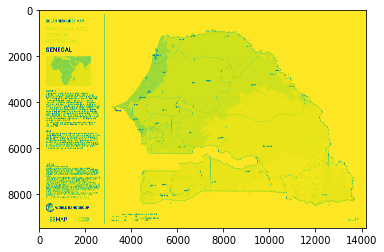

<AxesSubplot:>

In [31]:
# Plot band 1
show((raster, 1))

Let’s see how the different bands look like by placing them next to each other:

Text(0.5, 1.0, 'Blue')

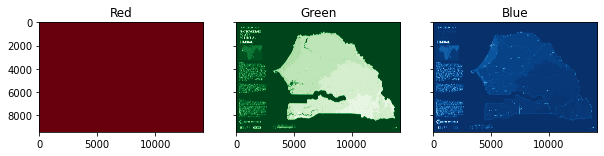

In [32]:
# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((raster, 4), cmap='Reds', ax=ax1)
show((raster, 3), cmap='Greens', ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

## Histogram of raster data

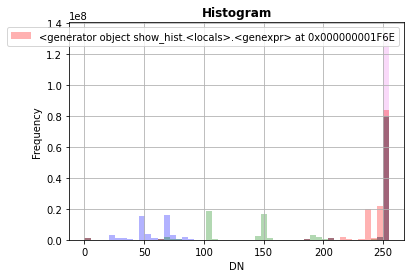

In [34]:
from rasterio.plot import show_hist

show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")

## Masking and Clipping raster data

One common task in raster processing is to clip raster files based on a Polygon. The following example shows how to clip a large raster based on a bounding box.


In [36]:
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import pycrs

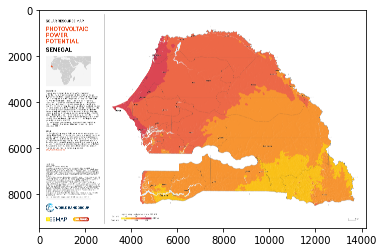

<AxesSubplot:>

In [38]:
# Visualize the NIR band
show(raster, 4)

Sources:\
    https://gisgeography.com/spatial-data-types-vector-raster/
    https://automating-gis-processes.github.io/site/notebooks/Raster/reading-raster.html